<a href="https://colab.research.google.com/github/LiddiBeltz/LiddiBeltz/blob/main/YaMusicCovers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Разработка ml-модели для сопоставления текстов музыкальных произведений и для поиска каверов.

## 1. Анализ данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
covers = pd.read_json('/content/drive/MyDrive/YaMusic/covers.json', lines=True)
lyrics = pd.read_json('/content/drive/MyDrive/YaMusic/lyrics.json', lines=True)
meta = pd.read_json('/content/drive/MyDrive/YaMusic/meta.json', lines=True)

In [3]:
datas = [covers, lyrics, meta]
for i in range(len(datas)):
    print(datas[i].head())
    print()

                  original_track_id                          track_id  \
0  eeb69a3cb92300456b6a5f4162093851  eeb69a3cb92300456b6a5f4162093851   
1  fe7ee8fc1959cc7214fa21c4840dff0a  fe7ee8fc1959cc7214fa21c4840dff0a   
2  cd89fef7ffdd490db800357f47722b20  cd89fef7ffdd490db800357f47722b20   
3  995665640dc319973d3173a74a03860c  995665640dc319973d3173a74a03860c   
4                              None  d6288499d0083cc34e60a077b7c4b3e1   

  track_remake_type  
0          ORIGINAL  
1          ORIGINAL  
2          ORIGINAL  
3          ORIGINAL  
4             COVER  

                            lyricId  \
0  a951f9504e89759e9d23039b7b17ec14   
1  0c749bc3f01eb8e6cf986fa14ccfc585   
2  e2c8830fbc86e5964478243099eec23a   
3  e2c8830fbc86e5964478243099eec23a   
4  7624653ca8522ba93470843c74961b7d   

                                                text  \
0  Живу сейчас обломами, обломками не той любви\n...   
1  Tell me your fable\nA fable\nTell me your fabl...   
2  You're ashamed about a

In [4]:
for i in range(len(datas)):
    print(datas[i].info())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71597 entries, 0 to 71596
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   original_track_id  4821 non-null   object
 1   track_id           71597 non-null  object
 2   track_remake_type  71597 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11414 entries, 0 to 11413
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   lyricId   11414 non-null  object
 1   text      11414 non-null  object
 2   track_id  11414 non-null  object
dtypes: object(3)
memory usage: 267.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71769 entries, 0 to 71768
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   track_id  71768 non-null  object 
 1   dttm      71768 non-null  float64
 

Присутствуют пропуски в language, isrc, original_track_id.

Посмотрим на данные с пропусками.

In [5]:
meta[meta['language'].isna()]

,track_id,dttm,title,language,isrc,genres,duration
2,955f2aafe8717908c140bf122ba4172d,1.637768e+12,Por Esa Loca Vanidad,None,QZNJZ2122549,"[FOLK, LATINFOLK]",260000.0
3,fae5a077c9956045955dde02143bd8ff,1.637768e+12,Mil Lagrimas,None,QZNJZ2166033,"[FOLK, LATINFOLK]",190000.0
4,6bede082154d34fc18d9a6744bc95bf5,1.637768e+12,Sexo Humo y Alcohol,None,QZNJZ2122551,"[FOLK, LATINFOLK]",203000.0
5,551331ee1444de6658e71933eb7f57a2,1.637768e+12,La Ultima Vez,None,QZNJZ2166034,"[FOLK, LATINFOLK]",173000.0
6,2be8bb01bb1aeef0908524dc11935a88,1.637768e+12,Homenaje a Pastor de los Santos,None,QZNJZ2122553,"[FOLK, LATINFOLK]",192100.0
...,...,...,...,...,...,...,...
71759,27338fa59732e7b6a6f89ea3e9cf7611,1.560281e+12,Little Wing,None,ES71G1408072,"[ROCK, ALLROCK]",190320.0
71760,e3899173fcdfbd30ff0b07c7e0dbdbc8,1.561064e+12,Shutter Island,None,CAB391902526,[ALTERNATIVE],206650.0
71761,86f1aff8c191baf6957fcda82fe6b3c3,1.560892e+12,Diamonds,None,ES50A1900470,"[ELECTRONICS, HOUSE]",281980.0
71763,496e3bddf448fbedab6a0825382618c4,1.560399e+12,Se Preparó,None,FR2X41997633,"[FOLK, LATINFOLK]",186340.0


In [6]:
meta[meta['isrc'].isna()]

,track_id,dttm,title,language,isrc,genres,duration
2151,16645e5e127d29b8bbbea6375a9344e2,1.640293e+12,Глава 4. Урок рисования,None,None,[FAIRYTALES],559040.0
2185,96f75d124808c84d823f09add1b6855c,1.640250e+12,Чижик-пыжик (А. Пинегин — А. Усачев),None,None,[FORCHILDREN],144560.0
2238,77bf68f7657ba9f87ee6ae7af3dc8999,1.640272e+12,Повторение счёта до 12,None,None,[FORCHILDREN],97720.0
2317,fb97e639240fb249756b40e0f88387cb,1.640334e+12,Глава 12. Пятно,None,None,[FAIRYTALES],103280.0
3838,be76b11b186c8f8a6afb34a23f64b132,1.642680e+12,Americano,None,None,[],225800.0
...,...,...,...,...,...,...,...
71703,fefdb000f83cc54a6cd15cd330e94804,1.559822e+12,Buona Sera Ciao Ciao,None,None,[POP],222300.0
71704,bb7c35e220d721f5271f00993b65c150,1.559822e+12,Eray,None,None,[POP],249880.0
71705,85ae0838be340db39deda0c04f3898bb,1.559822e+12,My Heart Will Go On,None,None,[POP],286410.0
71706,f3ce217d8dc57c625002748b79dba088,1.559822e+12,What is Love,None,None,[POP],309050.0


Посмотрим распределение длительностей.

In [7]:
meta['duration'].describe()

count    7.176800e+04
mean     2.049187e+05
std      8.559854e+04
min      0.000000e+00
25%      1.613700e+05
50%      1.993950e+05
75%      2.390700e+05
max      5.487300e+06
Name: duration, dtype: float64

В датасэте присутствуют книги. Так как наша задача - рекомендация музыки, эти данные не подходят.

In [8]:
covers[covers['original_track_id'].isna()]

,original_track_id,track_id,track_remake_type
4,None,d6288499d0083cc34e60a077b7c4b3e1,COVER
5,None,4da9d7b6d119db4d2d564a2197798380,COVER
6,None,2bf283c05b601f21364d052ca0ec798d,COVER
7,None,5eb13cb69b6e20dd7a42030f5936a9dc,COVER
8,None,109f91266ef89cc3690079b28abfe9a3,COVER
...,...,...,...
71581,None,ca9ef71613177a1ccf9e12e65b94e37b,COVER
71582,None,7aba7ec7d0aefd0ac3a3bc74be201853,COVER
71583,None,86c0bc5713e2817bec42e6274e0dc61c,COVER
71593,None,78b2db35476f134dc3cdfbf4d77ba034,COVER


Присутствует множество неизвестных оригинальных треков у каверов.

In [9]:
for i in range(len(datas)):
    print(datas[i]['track_id'].duplicated().sum())
    print()

0

1137

0



Посмотрим дубликаты.

In [10]:
duplicateRows = lyrics[lyrics.duplicated(['track_id'])]
duplicateRows

,lyricId,text,track_id
263,87966c7b6254c6298e18db41fea1b1a2,You ain't nothin' but a hound dog\nJust crocki...,ea09c90790b997b6e384d75d424b3ffe
494,74825f6c746beceb4da57cf80d7d6c10,For the longest time we jamming at the party\n...,dec84e10ae3ecc5c363f495724799322
502,4d0a6051746a18c918bae3926710cb97,You were the shadow to my light\nDid you feel ...,db69f2a265624a834d6e2a1238f6f225
590,4a95959841d857516385893009cfe841,You were the shadow to my light\nDid you feel ...,db69f2a265624a834d6e2a1238f6f225
616,74c0d9fdd29e454653bfa23ec57e2808,"All my friends are heathens, take it slow\nWai...",a367959976d3ca166beb46bdf66eefd0
...,...,...,...
11398,49df743c7a49ab4b90825282434f2e72,All the crazy shit I did tonight\nThose will b...,f66bf9c7becdeb7c4ce9c70722a2009c
11399,a16a7e2d216c914a505ec01102d57bb4,Now and then I think of when we were together\...,76cee823cdb700bb2d24f6db2c34587c
11408,da374afb1d2d6fbc85b40e68d22d2ab1,As he came into the window\nIt was the sound o...,53bf57b9e4d3eed991f57a603a41c9d4
11411,22bae9d3185254ea34072c692a2cd63d,Left a good job in the city\nWorking for the m...,d5c149b59a800a6f9f61adda6d3e1b1d


Есть дубликаты по track_id, но с разным lyricId

In [11]:
covers.head()

,original_track_id,track_id,track_remake_type
0,eeb69a3cb92300456b6a5f4162093851,eeb69a3cb92300456b6a5f4162093851,ORIGINAL
1,fe7ee8fc1959cc7214fa21c4840dff0a,fe7ee8fc1959cc7214fa21c4840dff0a,ORIGINAL
2,cd89fef7ffdd490db800357f47722b20,cd89fef7ffdd490db800357f47722b20,ORIGINAL
3,995665640dc319973d3173a74a03860c,995665640dc319973d3173a74a03860c,ORIGINAL
4,None,d6288499d0083cc34e60a077b7c4b3e1,COVER


In [12]:
covers['track_remake_type']

0        ORIGINAL
1        ORIGINAL
2        ORIGINAL
3        ORIGINAL
4           COVER
           ...   
71592    ORIGINAL
71593       COVER
71594       COVER
71595    ORIGINAL
71596    ORIGINAL
Name: track_remake_type, Length: 71597, dtype: object

Удалим дубликаты в текстах песен.

In [13]:
lyrics = lyrics.drop_duplicates()

Посмотрим количество каверов и оригиналов.

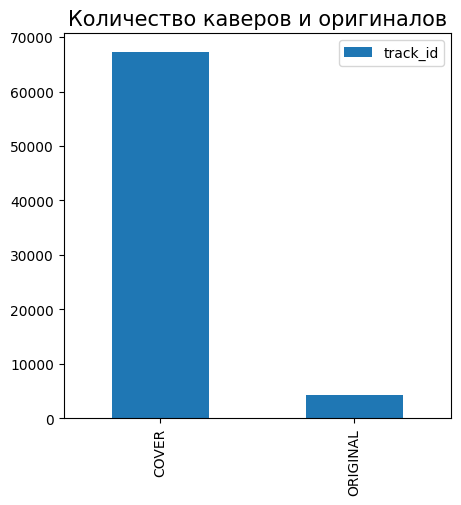

In [14]:
covers.groupby('track_remake_type').agg({'track_id':'count'}).plot(kind='bar', figsize=(5,5))
plt.title("Количество каверов и оригиналов", fontsize = 15)
plt.xlabel('')
plt.ylabel('')
plt.show()

Посмотрим распределение языков.

<Axes: >

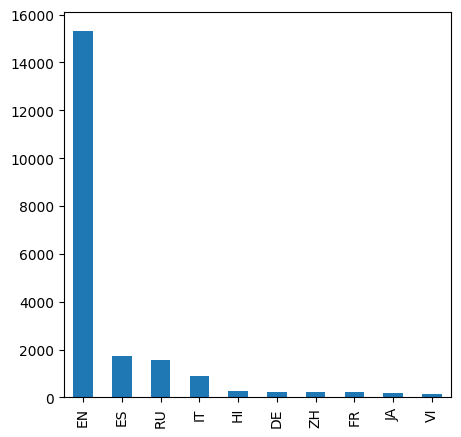

In [15]:
meta['language'].value_counts().head(10).plot(kind='bar', figsize=(5,5))

Изменим тип данных в столбце dttm.

In [16]:
meta['dttm'] = meta['dttm'].astype('datetime64[ns]')

Изучим жанры.

In [17]:
meta.sort_values(by='genres').sort_values(by='genres')

,track_id,dttm,title,language,isrc,genres,duration
15564,2ded56e085e4c60bbd376522b3dc043c,1970-01-01 00:26:01.576502,Talking in Your Sleep,None,PLS921753446,[],188500.0
71158,142bb8d1500b02cac9b911d8d9ff2e1a,1970-01-01 00:25:56.612644,I'm so Excited,None,PLS921753445,[],201630.0
71159,4fb7706d8b3b12af8423b4f5d921f85f,1970-01-01 00:25:56.612644,Shalala Lala,None,PLS921753832,[],193910.0
52703,7e43e89be73147d520807dbd0245ec44,1970-01-01 00:24:57.070986,Tage Wie Diese,None,TCADC1773260,[],288710.0
52704,72d4cd36e45a5c038cf35c95862ec632,1970-01-01 00:24:57.071016,Hello,None,TCADC1773367,[],300040.0
...,...,...,...,...,...,...,...
15686,31ecbad353f463f8006fa92296488875,1970-01-01 00:26:04.606800,Entangled,None,TCAEI1905626,"[VIDEOGAME, SOUNDTRACK]",104330.0
40869,334657a315344e1687c683de7297e4b1,1970-01-01 00:28:11.010000,Prekrasnoe Dalyoko,None,RUA1D2381941,"[VIDEOGAME, SOUNDTRACK]",120980.0
67254,b52ab7397bf1f3a05f1191537a2f9e4a,1970-01-01 00:25:41.460502,Load Out,None,CA2BN1501722,"[VIDEOGAME, SOUNDTRACK]",104430.0
15687,ce3f6a4b227d6af10f210a95d8d23cb3,1970-01-01 00:26:04.606800,Border Worlds,None,TCAEI1905653,"[VIDEOGAME, SOUNDTRACK]",102660.0


В столбце genres данные записаны в типе list. Надо сменить тип, так как такой обрабатывать сложно.
Присутствуют строки без жанра, и в датасете одна строка полностью None.

Удалим None в таблице meta.

In [18]:
meta = meta.dropna (subset=['track_id'])

Сделаем колонку track_id индексом для удобства объединения

In [19]:
covers = covers.set_index('track_id')
lyrics = lyrics.set_index('track_id')
meta = meta.set_index('track_id')

## 2. Предобработка данных

In [20]:
meta['genres'].value_counts().head(20)


[FOLK, LATINFOLK]              18391
[POP]                          13157
[ROCK, ALLROCK]                 5898
[ALTERNATIVE]                   3570
[FOLK]                          2645
[]                              2352
[ELECTRONICS]                   2231
[SOUNDTRACK]                    2181
[DANCE]                         2166
[SPIRITUAL]                     1552
[RAP]                           1531
[POP, RUSPOP]                   1436
[CLASSICAL, CLASSICALMUSIC]      980
[JAZZ]                           818
[CLASSICMETAL, METAL]            666
[RUSRAP, RAP]                    645
[FOREIGNBARD, BARD]              581
[METAL]                          558
[COUNTRY]                        502
[PUNK]                           500
Name: genres, dtype: int64

In [21]:
meta['genres'].explode()

track_id
c3b9d6a354ca008aa4518329aaa21380          DANCE
c57e3d13bbbf5322584a7e92e6f1f7ff    ELECTRONICS
955f2aafe8717908c140bf122ba4172d           FOLK
955f2aafe8717908c140bf122ba4172d      LATINFOLK
fae5a077c9956045955dde02143bd8ff           FOLK
                                       ...     
7cba0f30eaa8766d6c203eff2f3750a2            POP
26b6aca1c6a02ad0e2a939164716657e    ALTERNATIVE
d904dda141238e6ad1b428bfbb21262d    ALTERNATIVE
5731fc0a34c663a0c0082c712df15266            POP
5731fc0a34c663a0c0082c712df15266         RUSPOP
Name: genres, Length: 107285, dtype: object

При попытке использования explode() для устранения типа list создаются дубли, так как метод раскрывает list в новые строки.

Объединим таблицы.

In [22]:
df = meta.join(covers, how='left')
df = df.join(lyrics, how='left')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72905 entries, 0000757a652c12554a82002cd90cc10a to ffff9a22aa441db772206280ffb8b52e
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dttm               72905 non-null  datetime64[ns]
 1   title              72905 non-null  object        
 2   language           22870 non-null  object        
 3   isrc               72566 non-null  object        
 4   genres             72905 non-null  object        
 5   duration           72905 non-null  float64       
 6   original_track_id  5378 non-null   object        
 7   track_remake_type  72571 non-null  object        
 8   lyricId            11414 non-null  object        
 9   text               11414 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 6.1+ MB


In [24]:
df.head()

,dttm,title,language,isrc,genres,duration,original_track_id,track_remake_type,lyricId,text
track_id,,,,,,,,,,
0000757a652c12554a82002cd90cc10a,1970-01-01 00:27:12.244315,Dil Kyun Ye Mera Shor Kare,HI,QZPJ32103856,[POP],221540.0,None,COVER,344613f3596f8e9ee7ac2a6e92133a58,दिल क्यूँ ये मेरा शोर करे?\nदिल क्यूँ ये मेरा ...
00017038a565df4b72048268e7623599,1970-01-01 00:27:36.104400,Un Hombre Normal,ES,QZN882241763,"[FOLK, LATINFOLK]",226320.0,None,COVER,fa545be436bdaaab85286b8e5d37749f,Se que nada pasara\nSi mañana no me ves\nY ten...
0002e85381698128b8b2a0f578ac2054,1970-01-01 00:27:00.341801,More Than a Feeling,None,AUXN22151479,[POP],270000.0,None,COVER,NaN,NaN
0003734c0dce387667e659709b20934e,1970-01-01 00:27:13.486088,Waltz For David,None,QZNJX2120988,"[JAZZ, CONJAZZ]",118820.0,None,COVER,NaN,NaN
000545f7357ee9a4bd1438505406875c,1970-01-01 00:22:43.032000,I'm Yours,None,USJCH1200347,[POP],248710.0,None,COVER,NaN,NaN


В данных присутствует множество пропусков. Нужно парсить данные.